In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

import matplotlib.pyplot as plt

from tqdm import tqdm
import xarray as xr
import numpy as np
import os

In [2]:
store = new_data_store("s3", root="deep-esdl-input")

In [3]:
list(store.get_data_ids())

['CMEMS-black-sea-sst.zarr',
 'CMEMS-black-sea-wave-height.zarr',
 'EO4SIBS-black-sea-altimetry.zarr',
 'EO4SIBS-black-sea-chl.zarr',
 'EO4SIBS-black-sea-sss.zarr',
 'cci-aod550-8d-0.25deg-256x128x128.zarr',
 'cci-cloud-8d-0.25deg-256x128x128.zarr',
 'cci-sm-8d-0.25deg-256x128x128.zarr',
 'curie_depth_200km_100m.zarr',
 'curie_depth_300km_100m.zarr',
 'era5-8d-0.25deg-256x128x128.zarr',
 'fluxcom-8d-0.25deg-256x128x128.zarr',
 'geothermal_heat_flow_200km_100m.zarr',
 'geothermal_heat_flow_300km_100m.zarr',
 'geothermal_heat_flow_uncertainty_200km_100m.zarr',
 'geothermal_heat_flow_uncertainty_300km_100m.zarr',
 'gfed4-burntarea-8d-0.25deg-256x128x128.zarr',
 'gleam-8d-0.25deg-256x128x128.zarr',
 'ice_thickness_100m.zarr',
 'magnetic_anomaly_100m.zarr',
 'modis-mcd43c4-vis-mask-8d-0.25deg-256x128x128.zarr',
 'oceanic-export-production-1M-9km-64x256x256.zarr',
 'phytoplankton-carbon-1M-9km-64x256x256.zarr',
 'phytoplankton-primary-production-1M-9km-64x256x256.zarr',
 'sif-gome2-JJ-8d-0.2

In [4]:
da = store.open_data('phytoplankton-carbon-1M-9km-64x256x256.zarr')
da

,Array,Chunk
Bytes,9.56 GiB,256.00 kiB
Shape,"(275, 2160, 4320)","(1, 256, 256)"
Count,2 Graph Layers,42075 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,9.56 GiB,256.00 kiB
Shape,"(275, 2160, 4320)","(1, 256, 256)"
Count,2 Graph Layers,42075 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


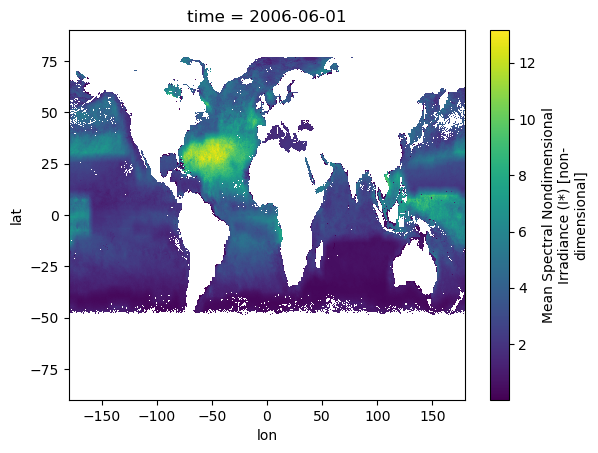

In [14]:
da.mean_spectral_i_star.where(lambda x: x < 9.96921e+36,other = np.nan)[100].plot.imshow()